In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


In [6]:
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(dataset.shape)


(284807, 31)


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
dataset = dataset.drop_duplicates()


In [10]:
print(dataset['Class'].value_counts())


0    283253
1       473
Name: Class, dtype: int64


In [11]:
print('Legit -', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2),'%')
print('Frauds -', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2),'%')

Legit Transactions: 99.83 %
Frauds Transactions: 0.17 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Legit, 1: Fraud)')

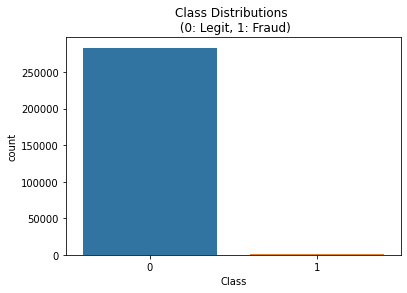

In [12]:
sns.countplot('Class', data=dataset)
plt.title('Class Distributions \n (0: Legit, 1: Fraud)')

In [13]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset.drop(['Amount'], axis=1, inplace=True)

In [14]:
scaled_amount = dataset['scaled_amount']

dataset.drop(['scaled_amount'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)

dataset.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [15]:
x = dataset.drop(['Time','Class'], axis=1)
y = dataset['Class']

In [16]:
dataset = dataset.sample(frac=1)
fraud_dataset = dataset.loc[dataset['Class'] == 1]                            
legit_dataset = dataset.loc[dataset['Class'] == 0][:473]                    
normal_distributed_dataset = pd.concat([fraud_dataset, legit_dataset])        
new_dataset = normal_distributed_dataset.sample(frac=1, random_state=42)      
new_dataset.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
263274,-0.295230,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,1
192529,-0.292032,129741.0,-1.396204,2.618584,-6.036770,3.552454,1.030091,-2.950358,-1.528506,0.189319,-1.433554,-5.569142,3.277546,-5.896937,-1.277102,-11.221805,0.326027,-2.497341,-1.588336,0.120289,0.170144,0.031795,0.143177,-0.390176,0.356029,-0.762352,0.096510,-0.487861,0.062655,-0.240732,1
112197,-0.095536,72552.0,-0.777771,0.908538,3.135094,2.534971,-0.445033,0.183348,0.042497,0.241546,-0.751792,0.106201,-0.725234,-0.073700,0.047311,-0.458816,-0.102484,0.137693,0.006366,-0.048444,-0.075842,0.086928,0.014678,0.099090,-0.153140,0.707995,0.090629,0.068839,0.092920,0.097820,0
249239,14.949103,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,0.713878,0.979675,-1.339031,0.984993,-0.382471,-0.934616,-0.052419,0.511162,0.731999,1.878612,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1
8845,0.116674,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,-4.138891,5.149409,-11.124019,0.543068,-7.840942,0.743634,-6.777069,-9.931765,-4.093021,1.504925,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,1


In [17]:
new_dataset.shape


(946, 31)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


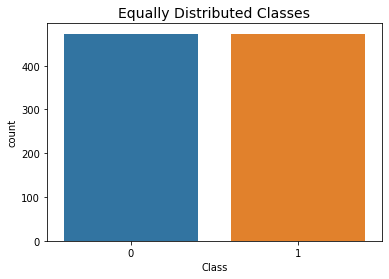

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_dataset['Class'].value_counts()/len(new_dataset))

sns.countplot('Class', data=new_dataset)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

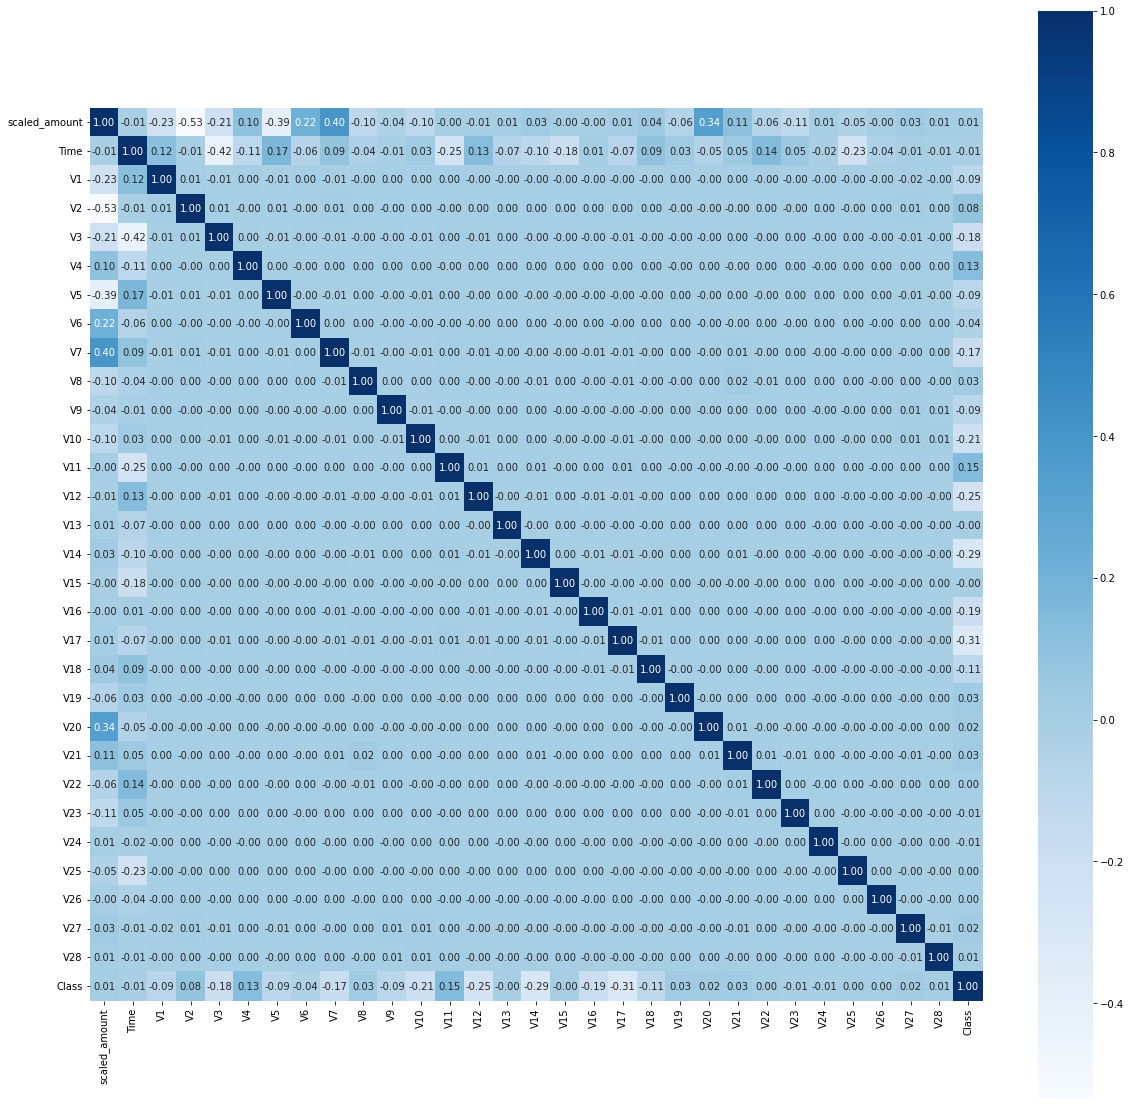

In [19]:
plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Blues')

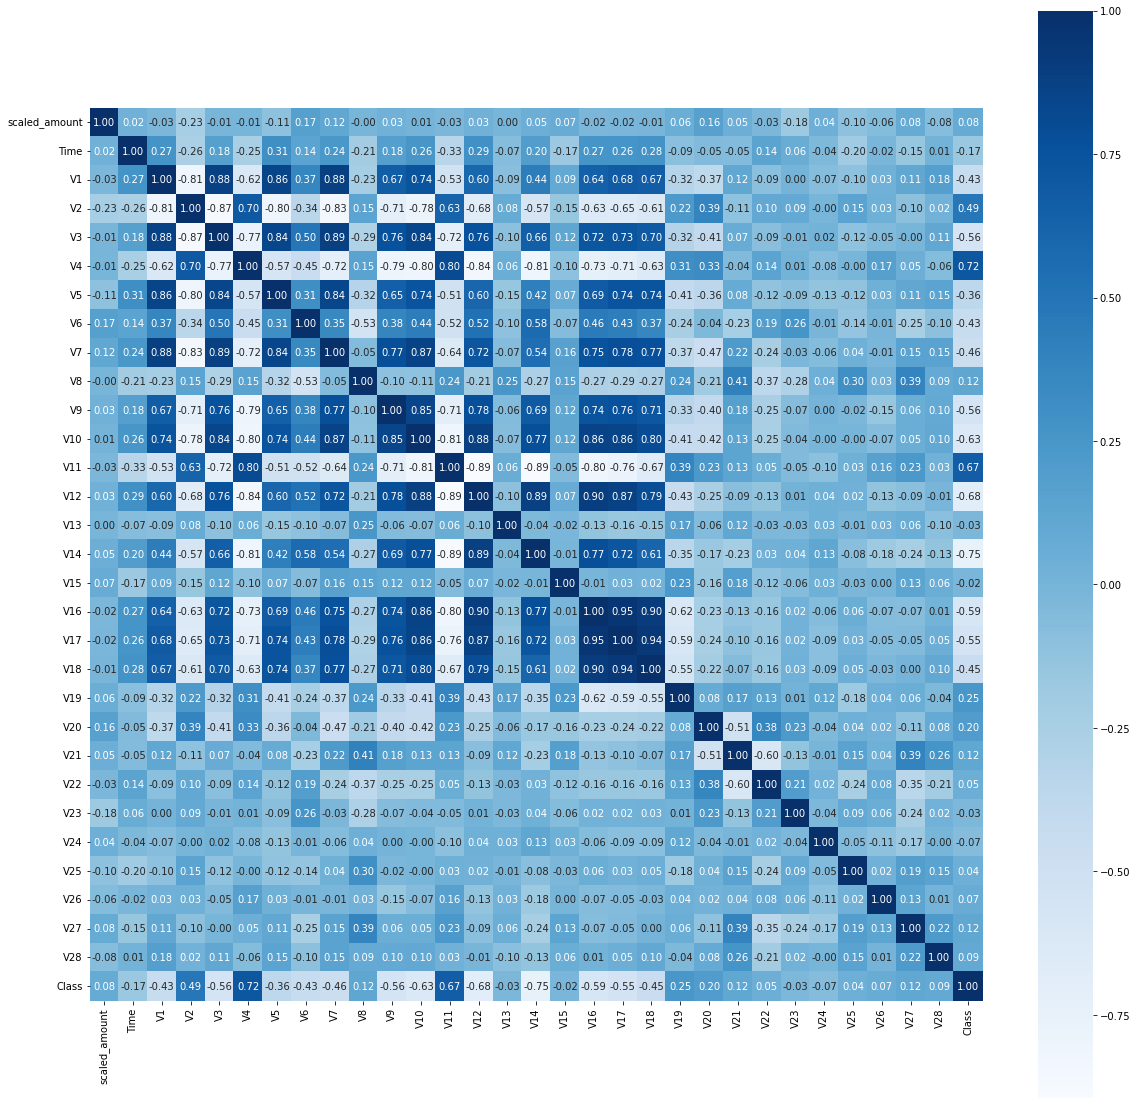

In [20]:
plt.subplots(figsize=(20,20))
sns.heatmap(new_dataset.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws = {'size':10}, cmap='Blues')

In [21]:
x = new_dataset.drop(['Time', 'Class'], axis=1)
y = new_dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(756, 29) (190, 29)


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = model.predict(x_test)
print("Accuracy score:",(round(accuracy_score(y_test, y_pred)*100, 2)),'%')

Accuracy score: 94.21 %


[Text(0, 0.5, ''), Text(0, 1.5, '')]

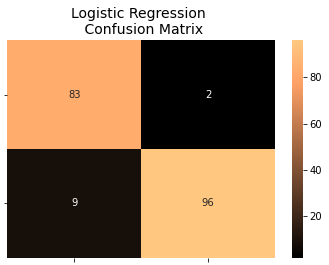

In [24]:
log_reg_cf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

In [25]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94        85
           1       0.98      0.91      0.95       105

    accuracy                           0.94       190
   macro avg       0.94      0.95      0.94       190
weighted avg       0.94      0.94      0.94       190



In [28]:
test_case_list = [4569.15587, 5.23498832, -1.2554789558, -0.458712347,0.2254113688, 5.235235894, 8972.254887268, -0.0214770257, -0.21544785, 1.254702288, -0.25871003687, -1.25410287, 2.032912158, -6.560124295, 0.022937323, -1.5681100225, -0.5982236987, -7.2510147559, 5.2147001254, -3.2325232560, -1.1452366985, 1.2547800235, -0.455871005, -0.78542004, 0.0026745787, -0.23597007, 7.1555887265, 0.102548788, -0.569702697]

test_case_df = pd.DataFrame(test_case_list)               
test_case = test_case_df.T                                
test_case_prediction = model.predict(test_case)           
if(test_case_prediction == 0):                           
    print('The Transaction was Legit')
else:
    print('The Transaction was Fraud.')

The Transaction was Fraud.
